##  Hierarchical Clustering - Grupo 21

### Pasos de la actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Entrenar el modelo configurando los diferentes hiperparámetros.
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [ ]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [58]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('./Mall_Customers.csv')
dataset.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
#Describir los datos
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
#Identificacion de datos faltantes
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [61]:
#Removemos columnas que no sean valores numéricos o de interés
data=dataset.drop(['Gender', 'CustomerID'], axis=1)
data.head(5)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


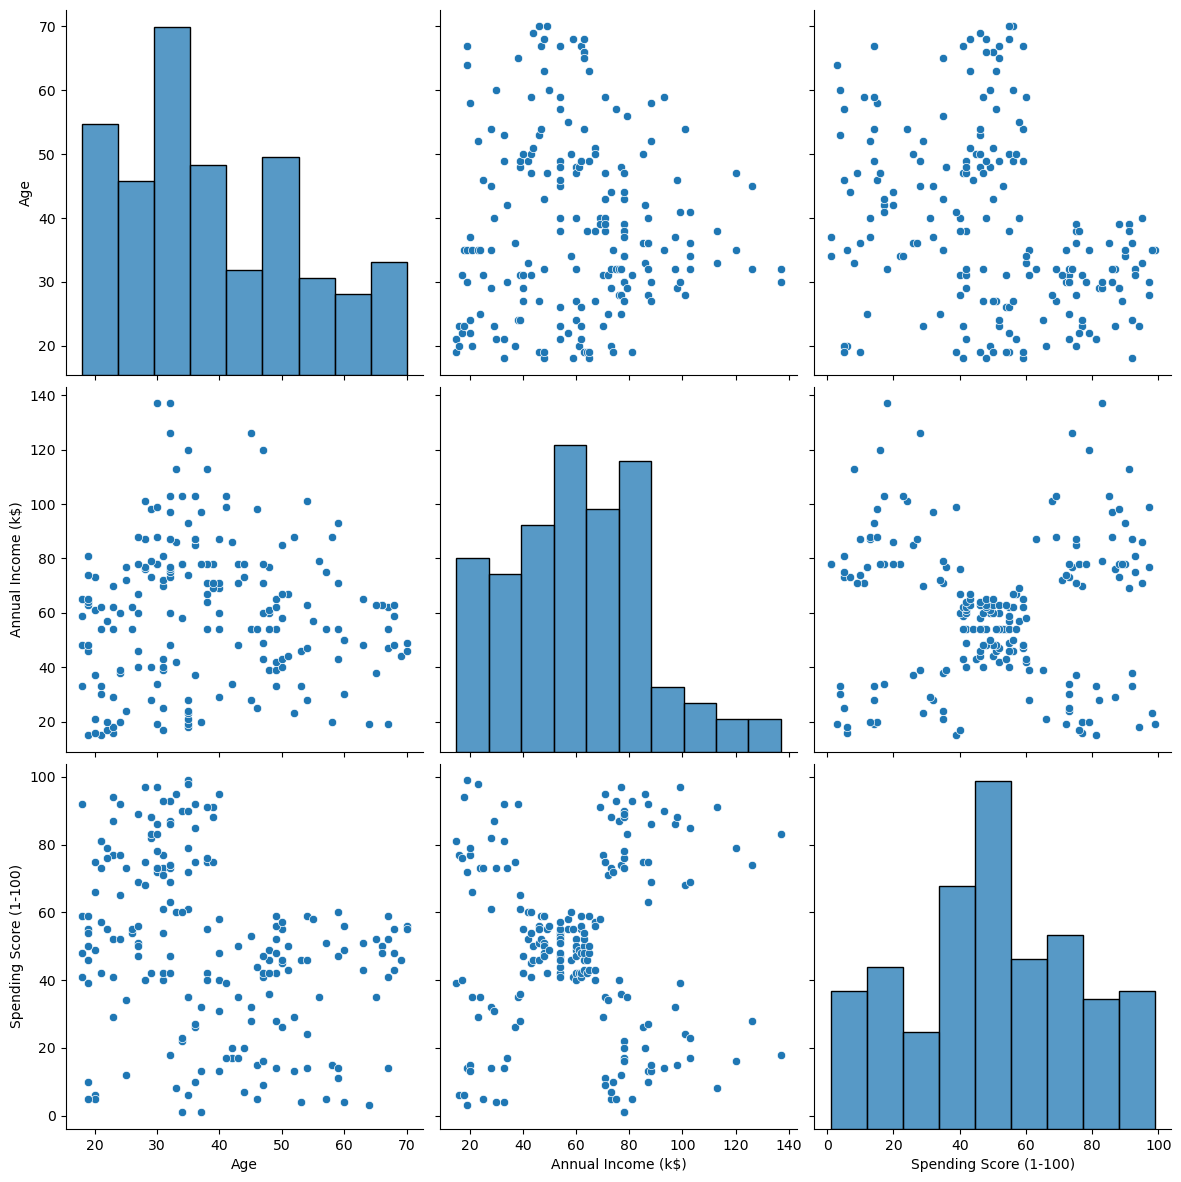

In [62]:
#Identificacion de datos
sns.pairplot(data.dropna(), size=4,kind='scatter')

In [63]:
# Matriz de correlación
corr_matrix = data.corr()
corr_matrix

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

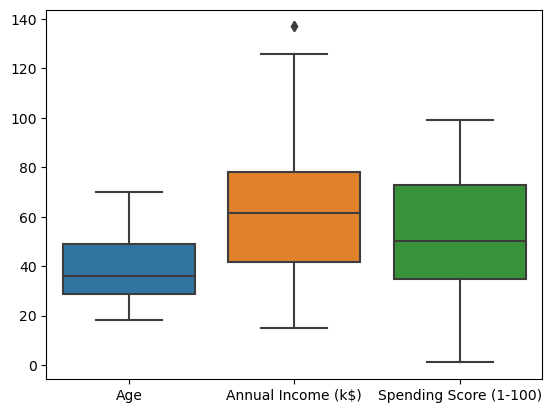

In [64]:
# Diagramas de caja para cada columna
sns.boxplot(data=data)

In [65]:
# Estandarizar los datos antes de aplicar algoritmos de aprendizaje
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Característica de interes:
- Las columnas Age, Annual Income y Spending Score resultan de interés para este caso de algoritmo de aprendizaje

In [66]:
# Vista de las distintas columnas
data.value_counts()

Age  Annual Income (k$)  Spending Score (1-100)
18   33                  92                        1
47   43                  41                        1
43   71                  35                        1
     78                  17                        1
44   73                  7                         1
                                                  ..
31   81                  93                        1
32   48                  47                        1
     60                  42                        1
     73                  73                        1
70   49                  55                        1
Name: count, Length: 200, dtype: int64

## 4. Entrenar el modelo configurando los diferentes hiperparametros

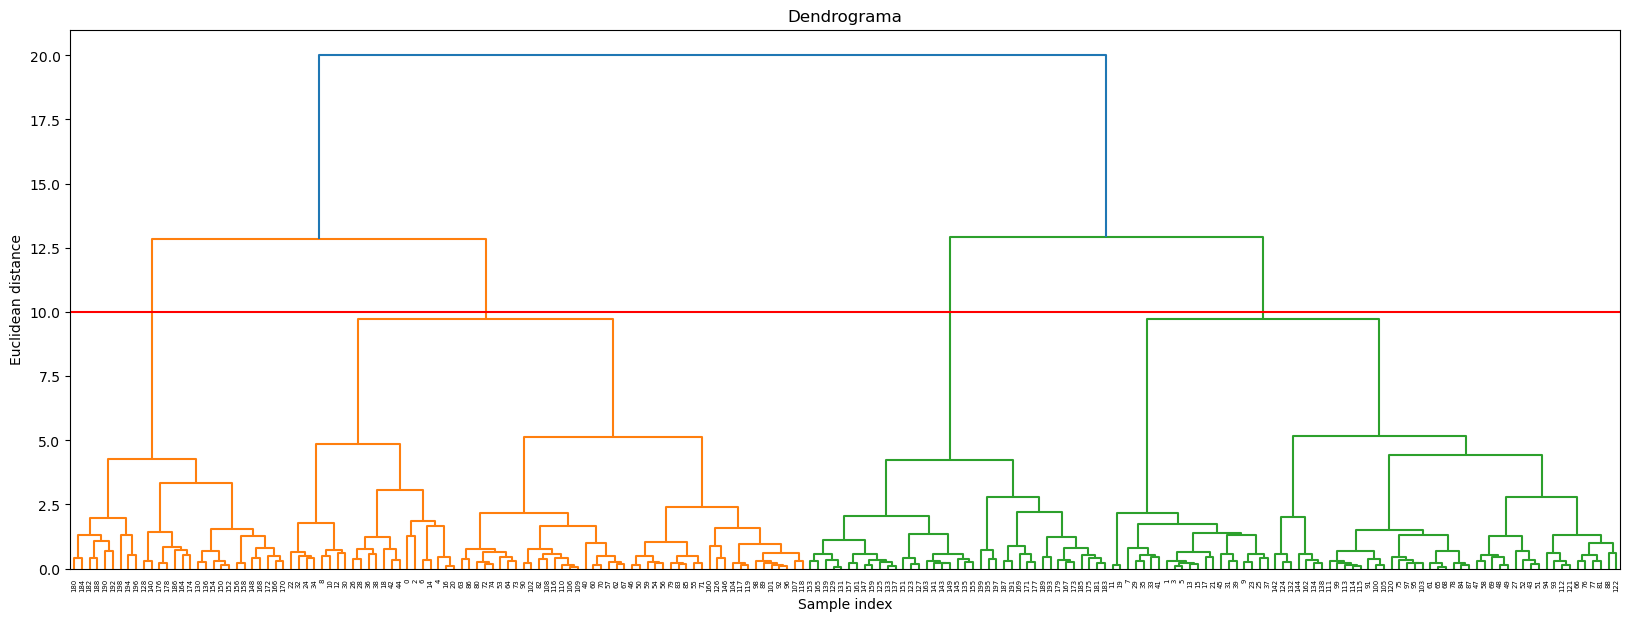

In [67]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [68]:
#Generamos valores de jerarquía de cluster con total de 2 clusters según la tabla de Silhouette para identificar su cantidad óptima
hier_clustering = AgglomerativeClustering(n_clusters=2)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

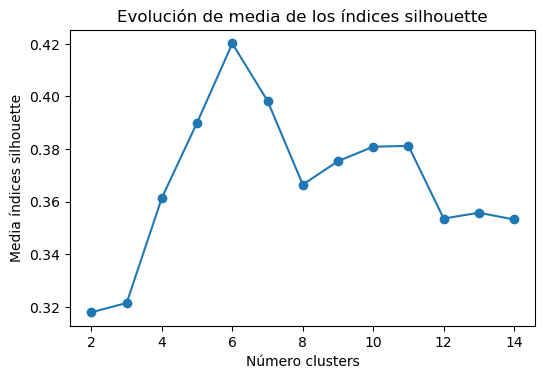

In [69]:
# Método silhouette para identificar el número óptimo de clusters
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [80]:
# Calcular medidas de calidad para Clustering Jerárquico
print("Medidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.31795733680759597
Índice de Calinski-Harabasz: 99.00066801676013
Davies-Bouldin Index: 1.3082962894168522


In [71]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.6261774947075186, array([20.00004498,  1.28368768, 20.00004498, ..., 20.00004498,
        0.74145991, 20.00004498]))


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [72]:
# Obtenemos las etiquetas de cada punto de nuestros datos para su examinación según la cantidad de clusters
labels = labels_hier
colores=['red','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

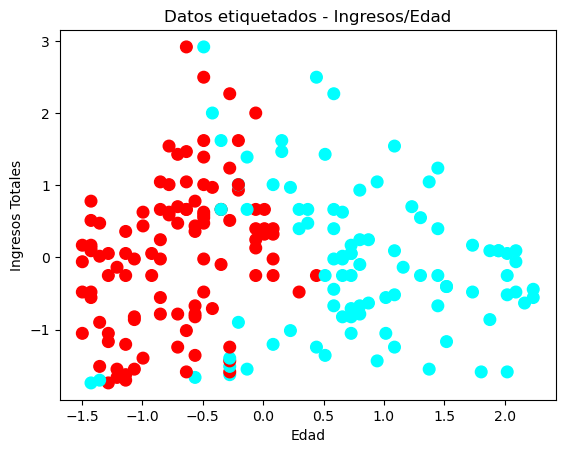

In [73]:
#Análisis Edad - Ingresos totales
f1 = X['Age'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados - Ingresos/Edad')
plt.xlabel('Edad')
plt.ylabel('Ingresos Totales')
plt.show()

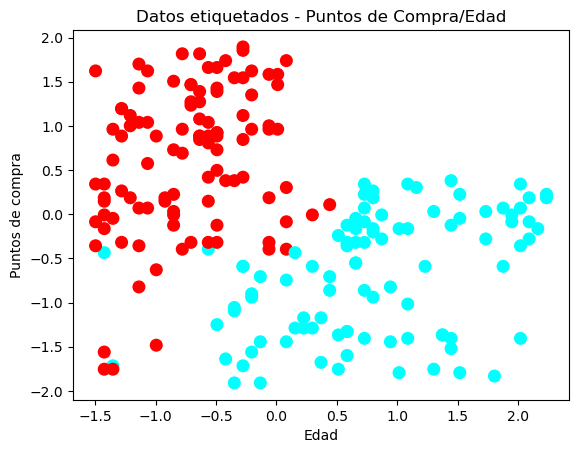

In [74]:
#Análisis Edad - Puntos de Compra
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados - Puntos de Compra/Edad')
plt.xlabel('Edad')
plt.ylabel('Puntos de compra')
plt.show()

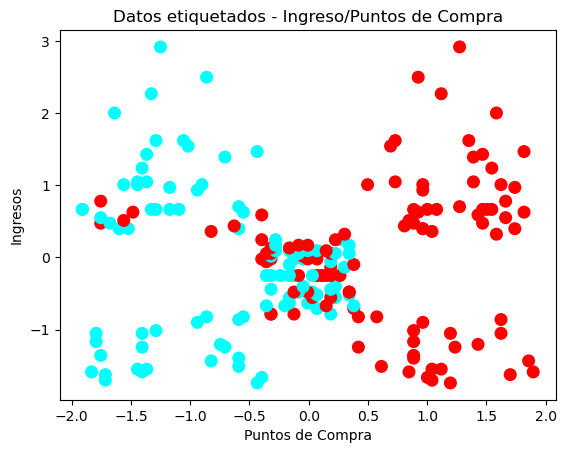

In [75]:
#Análisis Ingresos - Puntos de Compra
f1 = X['Spending Score (1-100)'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados - Ingreso/Puntos de Compra')
plt.xlabel('Puntos de Compra')
plt.ylabel('Ingresos')
plt.show()

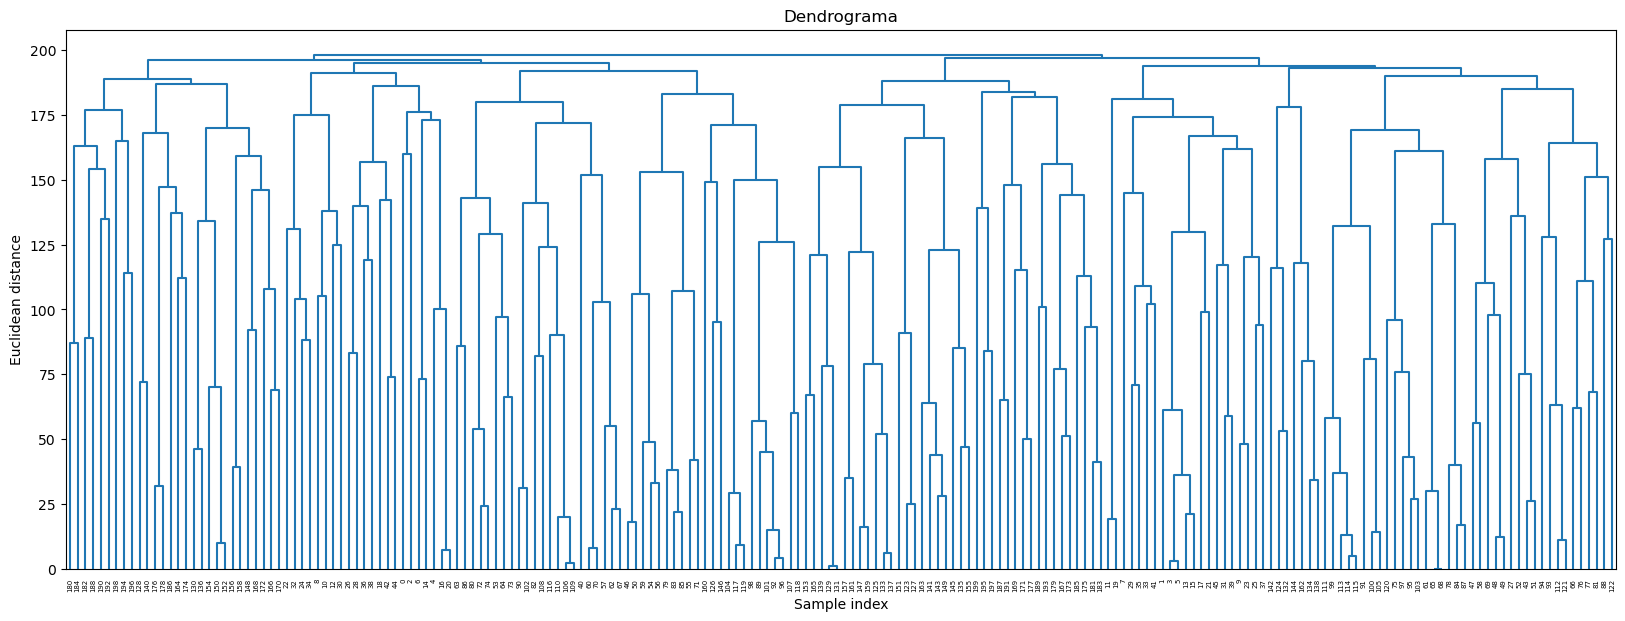

In [81]:
def plot_dendrogram(model, **kwargs):
    '''
    Se obtiene la información del modelo AgglomerativeClustering y establece su dengrograma con
    la función dengrograma de scipy.cluster.hierarchy
    '''
    from scipy.cluster.hierarchy import dendrogram
    import numpy as np    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

#Ejecutamos método con valores de jerarquía de cluster
plot_dendrogram(hier_clustering, color_threshold=0) 

## 7. Interpretar, analizar y documentar los resultados obtenidos.

De las medidas de calidad para Clustering Jerárquico podemos deducir que:
- Puntaje de Silhueta: Compara la similitud de puntos dentro de un grupo o cohesión en comparación con los demás grupos, entre más cercano a 1 más adecuado será el modelo. Para nuestro caso, obtuvimos un valor de 0.317, lo cuál nos indica que este algoritmo no es un modelo preciso para nuestra situación.
- Índice de Calinski-Harabasz: Calcula la calidad de la agrupación en base a sus características y su conjunto de datos, cuanto mayor sea el valor, mejor la calidad. En nuestro caso podemos observar que la calidad de la agrupación es buena debido a que se obtuvo un valor de 99.0. 
- Davies-Bouldin Index: Verifica qué tan bien se ha realizado la agrupación a través de las cantidades y características del conjunto de datos, entre más cercano a 0, mejor. En este caso se observa que la agrupación se ha realizado correctamente pues se obtuvo un valor de 1.3.

Del coeficiente de correlación cofenética, al observar un valor de 0.6 podemos deducir que la agrupación obtenida del algoritmo no es demasiado fiable ya que esta medida calcula la fiabilidad de la agrupación a través de la comparación de la distancia original de la matriz y su distancia cofenética, en donde mayor sea el valor, más fiable será.